In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 105ms/step - loss: 0.9626 - accuracy: 0.6033 - val_loss: 0.6375 - val_accuracy: 0.6702
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5508 - accuracy: 0.7181 - val_loss: 0.5117 - val_accuracy: 0.7488
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4789 - accuracy: 0.7713 - val_loss: 0.5572 - val_accuracy: 0.7316
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4166 - accuracy: 0.8138 - val_loss: 0.5430 - val_accuracy: 0.7268
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3384 - accuracy: 0.8541 - val_loss: 0.7754 - val_accuracy: 0.7054
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2554 - accuracy: 0.8941 - val_loss: 0.5465 - val_accuracy: 0.7570
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1690 - accuracy: 0.9363 - val_loss: 0.6891 - val_ac

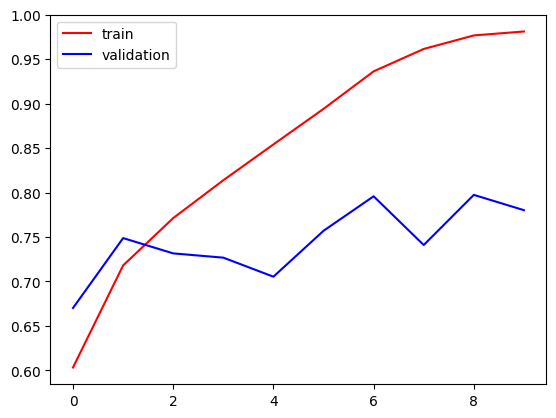

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

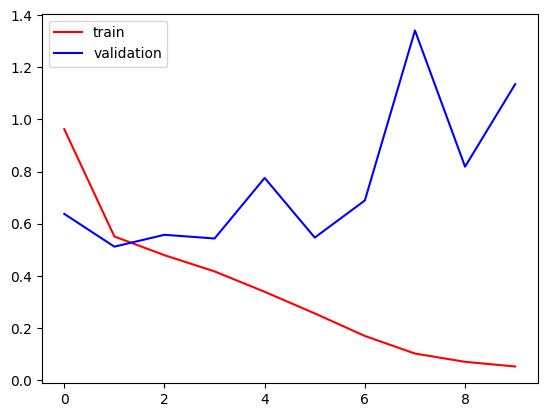

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [28]:
test_img = cv2.imread('/content/dog.jpg')

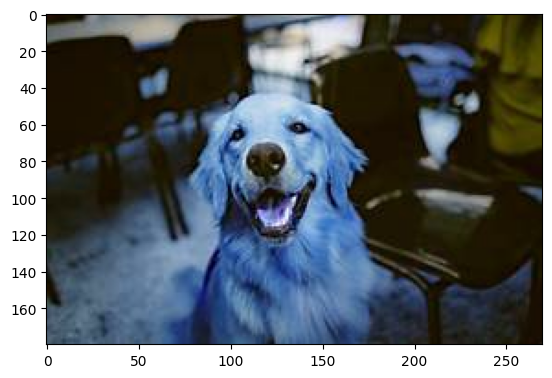

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(180, 270, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)